# 10.2 Hồi quy tuyến tính đơn giản

## Import các thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import tập dữ liệu

In [2]:
dataset = pd.read_csv('data/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Chia tập dữ liệu thành Training set và Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

## Huấn luyện mô hình Hồi quy tuyến tính đơn giản trên Training set

Giờ giai đoạn xử lý dữ liệu đã kết thúc và chúng ta có thể chuyển sang bước tiếp theo, huấn luyện mô hình hồi quy tuyến tính đơn giản trên tập huấn luyện và sử dụng bài kiểm tra để đánh giá nó. Chúng ta sẽ huấn luyện mô hình hồi quy tuyến tính đơn giản của mình để hiểu mối tương quan giữa số năm kinh nghiệm của những nhân viên này trong công ty và mức lương tương ứng của họ. Sử dụng LinearRegression() để xây dựng mô hình, sau đó huấn luyện mô hình này bằng cách phương thức fit().

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Dự đoán kết quả Test set
Chúng ta sẽ dùng phương thức predict() để dự đoán kết quả của quan sát trong tập kiểm tra.

In [6]:
y_pred = regressor.predict(X_test)

## Hiển thị kết quả Training set
Đầu tiên, chúng ta sẽ hiển thị kết quả tập huấn luyện. Bây giờ chúng ta chỉ muốn đưa vào một biểu đồ mức lương thực so với mức lương dự đoán. Về cơ bản, chúng ta sẽ có một biểu đồ 2D với trục x là số năm kinh nghiệm, từ 1 đến 10 và trục y là mức lương trong phạm vi mức lương được cho trong tập dữ liệu này. Và vì vậy, chúng ta sẽ vẽ các điểm đỏ cho biết mức lương thực tế và đường thẳng màu xanh dương là mức lương dự đoán.

Thư viện Matplotlib này cho phép chúng ta vẽ một số đồ họa đẹp gồm cả những đồ họa mà chúng ta sắp vẽ.

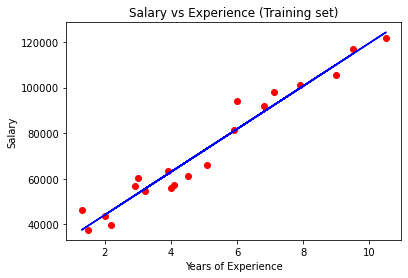

In [7]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Hiển thị kết quả Test set

Chúng ta sẽ thực hiện tương tự với kết quả tập kiểm tra. Sao chép mọi thứ và dán vào code mới ở đây. Và giờ chúng ta sẽ thay thế đúng chỗ. 

Một lần nữa, mức lương dự đoán của chúng ta trên đường màu xanh dương thực sự rất gần với mức lương thực tế.

Tuy nhiên, hãy nhớ lý do chúng ta có được một đường hồi quy tốt như vậy ở đây đơn giản là có một mối quan hệ tuyến tính trong tập dữ liệu giữa các feature và biến phụ thuộc của tập dữ liệu. Nói cách khác, chúng ta đã có một tập dữ liệu tuyến tính hoàn hảo hay một tập dữ liệu với các mối tương quan tuyến tính. Và tôi muốn đảm bảo rằng các bạn hiểu những kết quả tuyệt đẹp này sẽ không xảy ra cho bất kỳ tập dữ liệu nào bởi vì bạn sẽ phải làm việc trên tập dữ liệu với các mối quan hệ phi tuyến tính. Và với các tập dữ liệu này, bạn sẽ cần một mô hình phi tuyến.

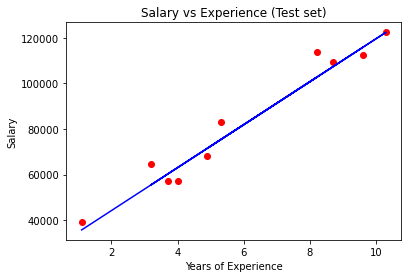

In [8]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, regressor.predict(X_test), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Đưa ra một dự đoán duy nhất (ví dụ: lương của một nhân viên có 12 năm kinh nghiệm)

**Lưu ý quan trọng:** Giá trị của feature (12 năm) được nhập trong một cặp dấu ngoặc vuông kép. Đó là bởi vì phương thức "predict" luôn cần một mảng 2D làm định dạng của các input. Và đặt 12 vào một cặp dấu ngoặc vuông kép làm cho input chính xác là một mảng 2D. Chỉ cần đặt:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

In [9]:
print(regressor.predict([[12]]))

[138436.80060814]


## Nhận phương trình hồi quy tuyến tính cuối cùng với giá trị của các hệ số

Như vậy, phương trình mô hình hồi quy tuyến tính đơn giản của chúng ta là:

$$\textrm{Salary} = 9426 \times \textrm{YearsExperience} + 25324$$

**Lưu ý quan trọng:** Để có được các hệ số này, chúng ta gọi thuộc tính "coef_" và "intercept_" từ đối tượng hồi quy. Các thuộc tính trong Python khác với các phương thức và thường trả về một giá trị đơn giản hoặc một mảng các giá trị.

In [10]:
print(regressor.coef_)
print(regressor.intercept_)

[9426.03876907]
25324.335379244316
